In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/content/spam_ham_dataset.csv')

In [4]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [7]:
df = data.drop(columns=["Unnamed: 0","label_num"])

In [8]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [9]:
df.shape

(5171, 2)

In [10]:
df.describe()

,label,text
count,5171,5171
unique,2,4993
top,ham,Subject: calpine daily gas nomination\r\n>\r\n...
freq,3672,20


In [11]:
emails = df['text']
labels = df['label']

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [13]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


In [15]:
def preprocess_email(email):
    # Tokenization
    words = word_tokenize(email.lower())  # Convert to lowercase for consistency

    # Removing stop words and stemming
    words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]

    # Join the words back into a single string
    return ' '.join(words)

In [16]:
preprocessed_emails = emails.apply(preprocess_email)

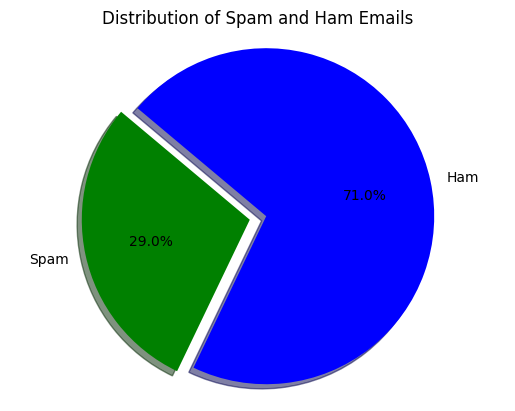

In [17]:
import matplotlib.pyplot as plt
spam_count = df[df['label'] == 'spam'].shape[0]
ham_count = df[df['label'] == 'ham'].shape[0]
labels = ['Spam', 'Ham']
sizes = [spam_count, ham_count]
colors = ['green', 'blue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Distribution of Spam and Ham Emails')
plt.show()

In [18]:
X = df['text']
y = df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4136,)
X_test shape: (1035,)
y_train shape: (4136,)
y_test shape: (1035,)


In [23]:
from sklearn.preprocessing import StandardScaler
# Step 2: Convert text data into numerical feature vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 3: Standardize the feature vectors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 4: Train the SVM model
svm_classifier = SVC(kernel='linear')  # Adjust C and gamma
  # You can try different kernels based on your data
svm_classifier.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [25]:
# Step 5: Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9749
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       742
        spam       0.96      0.95      0.96       293

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

